In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio

import torch
import torchaudio
import torchaudio.transforms as T  

from torch.utils.data import Dataset, DataLoader

# Use AutoProcessor instead of Wav2Vec2Processor
from transformers import (
    AutoProcessor,
    Wav2Vec2Model,
    Wav2Vec2ForSequenceClassification,
    Trainer,
    TrainingArguments
)

import warnings
warnings.filterwarnings('ignore')
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


### load the Datasets

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
        #print(label)
    if len(paths) == 5600:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [4]:
len(paths)

5600

In [5]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [6]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [7]:
## Create a dataframe
df = pd.DataFrame()
df['audio_paths'] = paths
df['labels'] = labels
df.head()

,audio_paths,labels
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [8]:
df['labels'].value_counts()

labels
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

### Exploratory Data Analysis

<Axes: xlabel='labels', ylabel='count'>

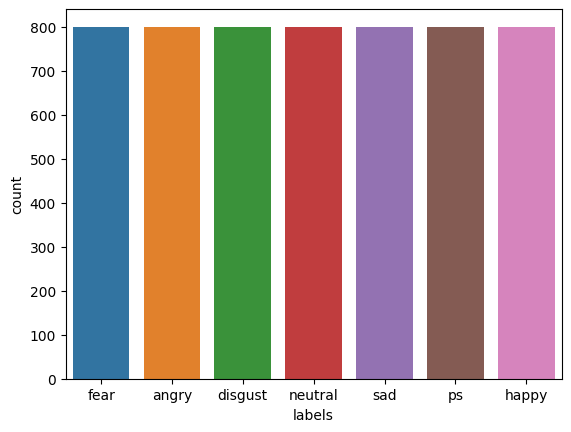

In [9]:
#df['label'] = df['label'].astype('category')
sns.countplot(data=df, x='labels')

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)  # Updated function
    plt.show()

def spectogram(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(f"Spectrogram of {emotion}", size=20)
    S = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.show()


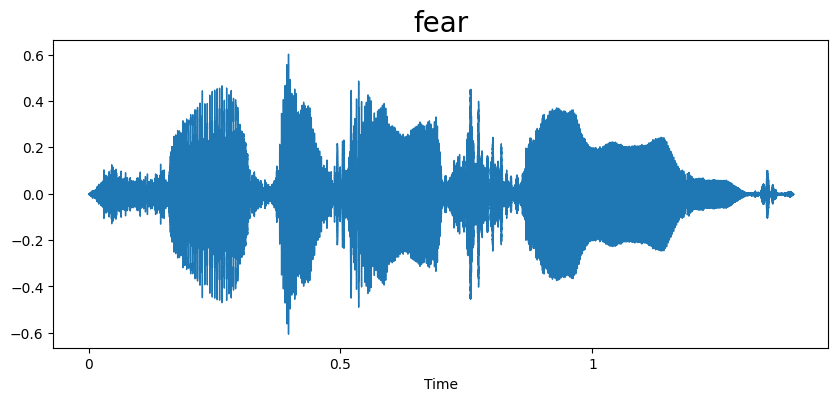

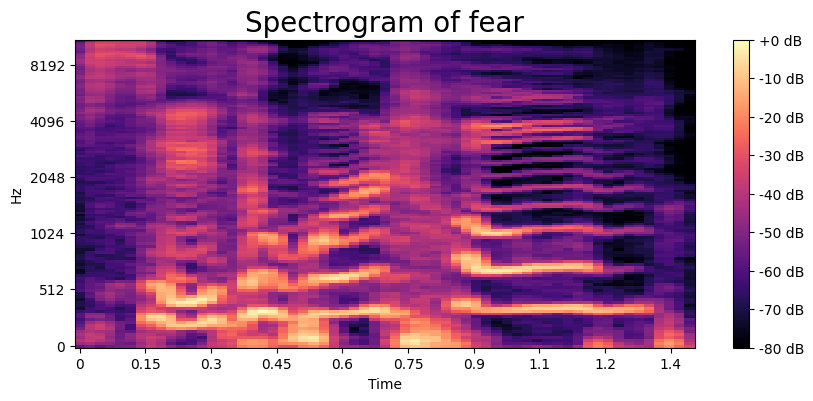

In [11]:
import numpy as np
import librosa
import pandas as pd
from IPython.display import Audio

# Check actual column names
#print("Available Columns:", df.columns)

# Rename column if necessary
# if 'label' not in df.columns:
#     if 'labels' in df.columns:
#         df.rename(columns={'labels': 'label'}, inplace=True)
#     else:
#         raise KeyError("Neither 'label' nor 'labels' column found in DataFrame!")

# Check if the emotion exists in the dataset
emotion = 'fear'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)
else:
    print(f"Emotion '{emotion}' not found in the DataFrame!")


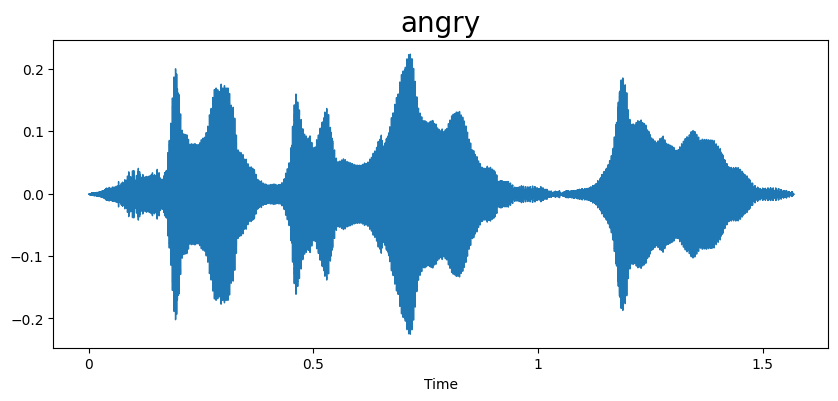

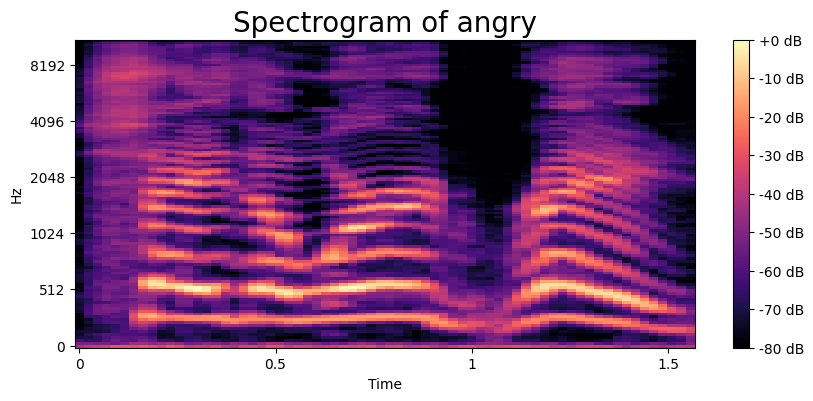

In [12]:
# emotion = 'angry'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'angry'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

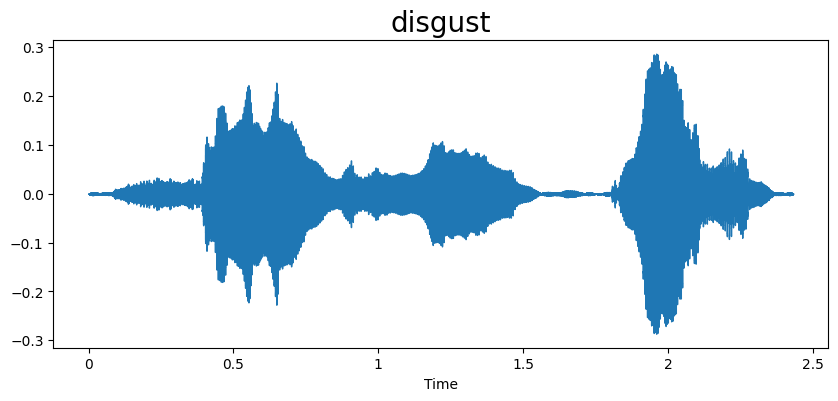

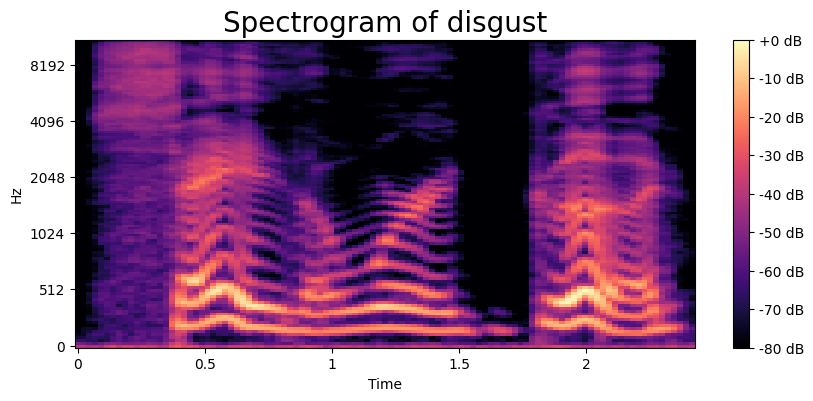

In [13]:
# emotion = 'disgust'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'disgust'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

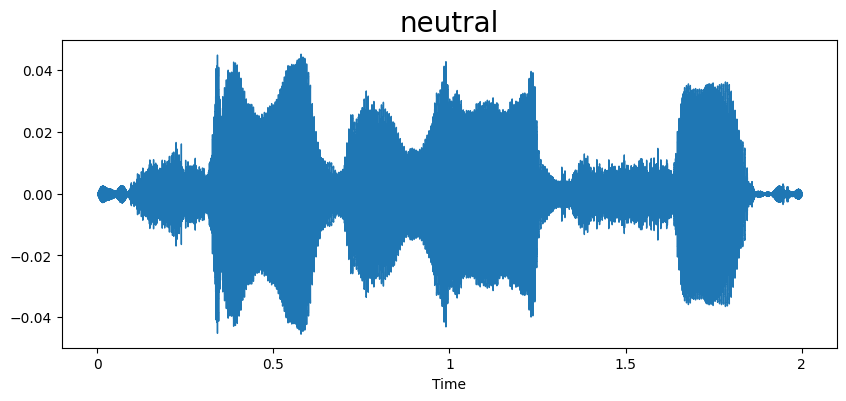

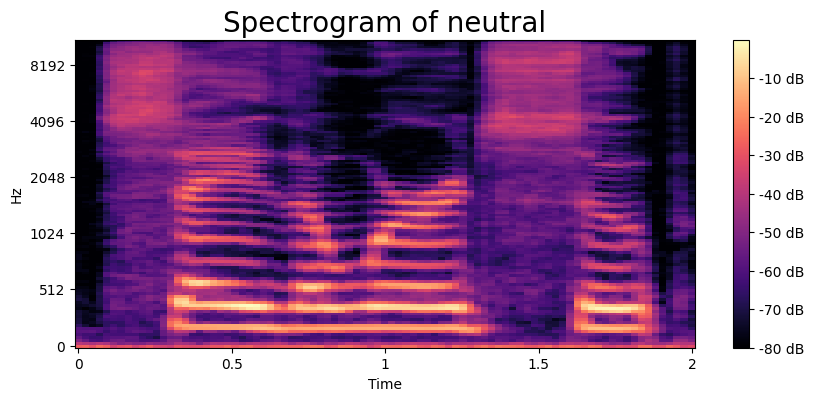

In [14]:
# emotion = 'neutral'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'neutral'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

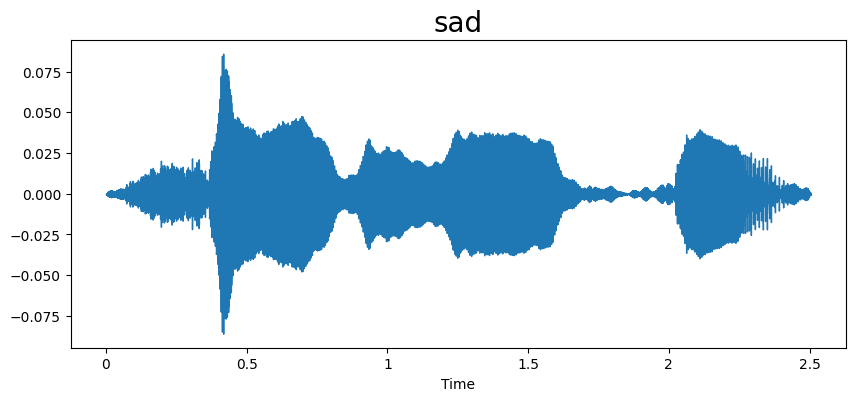

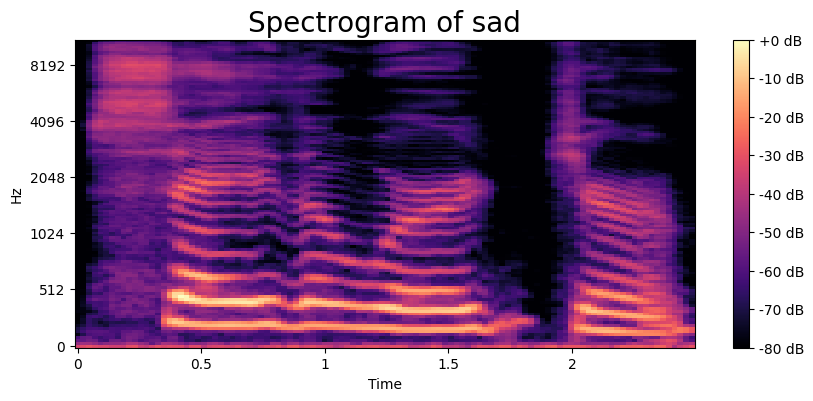

In [15]:
# emotion = 'sad'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'sad'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

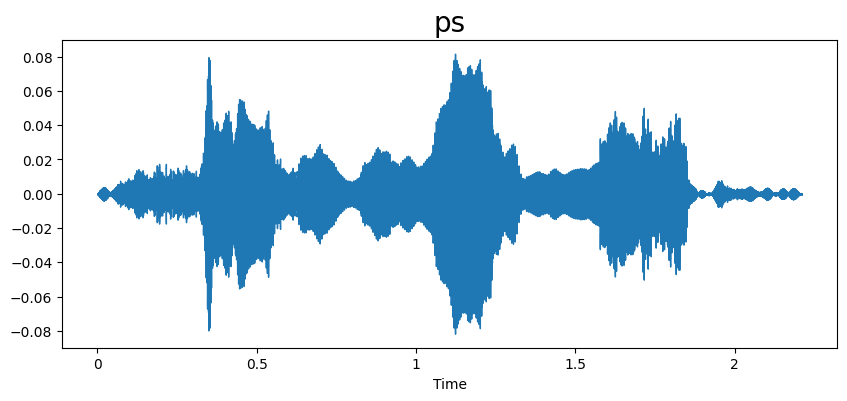

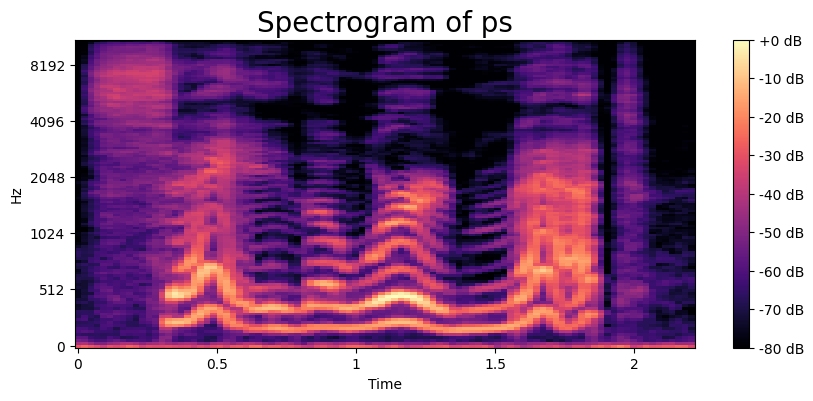

In [16]:
# emotion = 'ps'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'ps'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

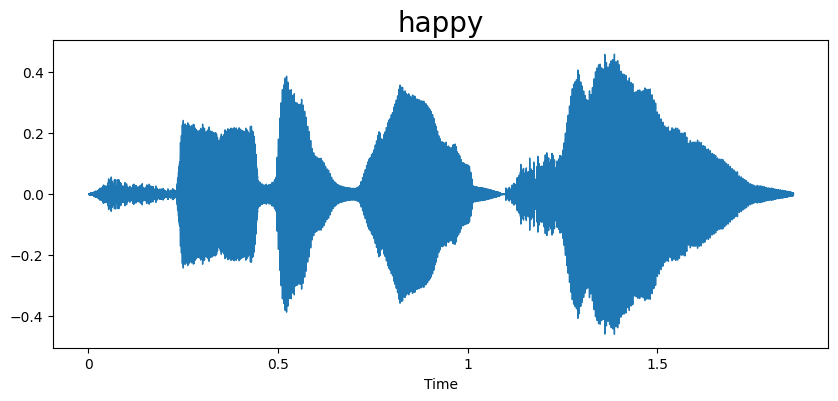

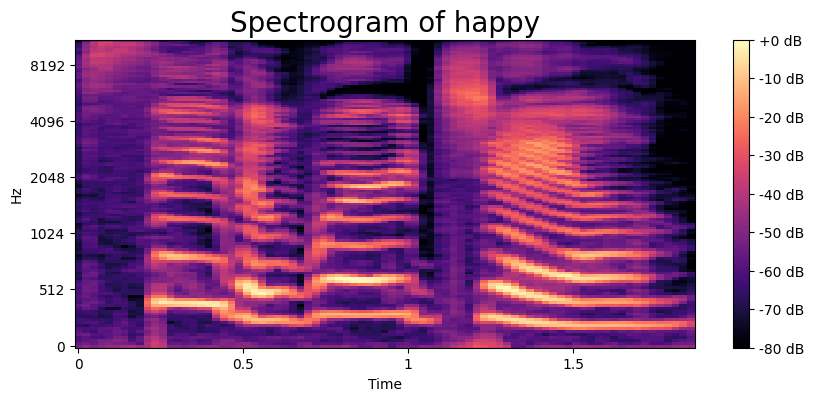

In [17]:
# emotion = 'happy'
# path = df['speech'][df['label'] == emotion].values[0]  # Use .values[0] to get the actual path
# data, sampling_rate = librosa.load(path)

# waveplot(data, sampling_rate, emotion)
# spectogram(data, sampling_rate, emotion)
# Audio(path)

emotion = 'happy'
if emotion in df['labels'].values:
    # Extract path
    path = np.array(df['audio_paths'][df['labels'] == emotion])[0]
    
    # Load audio file
    data, sampling_rate = librosa.load(path)
    
    # Plot waveplot & spectrogram
    waveplot(data, sampling_rate, emotion)
    spectogram(data, sampling_rate, emotion)
    
    # Play Audio
    Audio(path)

### Create Custom Dataset Class

In [18]:
import pandas as pd

# Ensure `label_column` contains the correct column name
label_column = "labels"  # Change this to the actual column name in your DataFrame

# Check if the column exists
if label_column not in df.columns:
    raise KeyError(f"Column '{label_column}' not found in DataFrame. Available columns: {df.columns}")

# Create label mappings
label_map = {label: idx for idx, label in enumerate(df[label_column].unique())}
inverse_label_map = {idx: label for label, idx in label_map.items()}

# Convert labels to integers
df[label_column] = df[label_column].map(label_map)

print(df.head(2))  # Display the first two rows to verify


                                         audio_paths  labels
0  /kaggle/input/toronto-emotional-speech-set-tes...       0
1  /kaggle/input/toronto-emotional-speech-set-tes...       0


In [19]:
emotion = 'ps'
path = np.array(df['audio_paths'][df['labels'] == 2])[0]
data, sampling_rate = librosa.load(path)
    
len(data)
sampling_rate * 2

44100

In [20]:
class SpeechEmotionDataset(Dataset):
    def __init__(self, df, processor, max_length=32000):
        self.df = df
        self.processor = processor
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        audio_path = self.df.iloc[idx]['audio_paths']  # Fix variable name
        label = self.df.iloc[idx]['labels']

        # Load the audio file
        speech, sr = librosa.load(audio_path, sr=16000)  # Fix variable name

        # Pad or truncate the speech to the required length
        if len(speech) > self.max_length:
            speech = speech[:self.max_length]
        else:
            speech = np.pad(speech, (0, self.max_length - len(speech)), 'constant')

        # Preprocess the audio file
        inputs = self.processor(speech, sampling_rate=16000, return_tensors='pt', padding=True, max_length=self.max_length)

        input_values = inputs["input_values"].squeeze()

        return {'input_values': input_values, 'labels': torch.tensor(label, dtype=torch.long)}


In [21]:
# split the data for train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
from transformers import AutoProcessor, Wav2Vec2ForSequenceClassification

model_name = "facebook/wav2vec2-base"

# Download and store model and processor locally
processor = AutoProcessor.from_pretrained(model_name)
model = Wav2Vec2ForSequenceClassification.from_pretrained(model_name, num_labels=7)

preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
#load the dataset
train_dataset = SpeechEmotionDataset(train_df, processor)
test_dataset = SpeechEmotionDataset(test_df, processor)

In [24]:
#train_dataset[0]['input_values'].size()
# Check the shape of input values
print(train_dataset[0]['input_values'].size()) 

torch.Size([32000])


In [25]:
#create dataloaders
train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

### Set Training Arguments

In [26]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to=[]
)

In [30]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

def compute_metrics(pred):
    labels = pred.label_ids  # Original labels
    preds = np.argmax(pred.predictions, axis=1)  # Model predicted labels

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    conf_matrix = confusion_matrix(labels, preds)

    # Print the metrics
    print("\n📊 Model Evaluation Metrics:")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"🎯 Precision: {precision:.4f}")
    print(f"🔄 Recall: {recall:.4f}")
    print(f"⭐ F1 Score: {f1:.4f}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(labels), yticklabels=set(labels))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [28]:
# import numpy as np
# from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# def compute_metrics(pred):
#     labels = pred.label_ids  # Original labels
#     preds = np.argmax(pred.predictions, axis=1)  # Model predicted labels

#     accuracy = accuracy_score(labels, preds)
#     precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

#     return {
#         "accuracy": accuracy,
#         "precision": precision,
#         "recall": recall,
#         "f1": f1
#     }

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.123300,1.000000,1.000000,1.000000,1.000000
2,0.483900,0.040543,1.000000,1.000000,1.000000,1.000000
3,0.483900,0.030256,1.000000,1.000000,1.000000,1.000000



📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


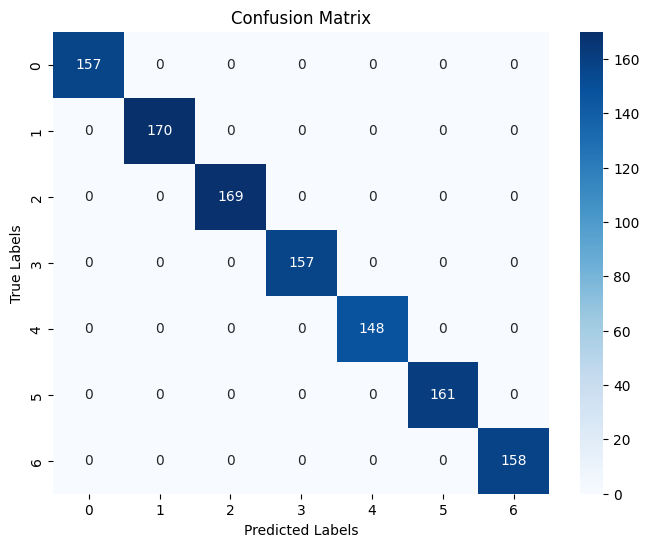


📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


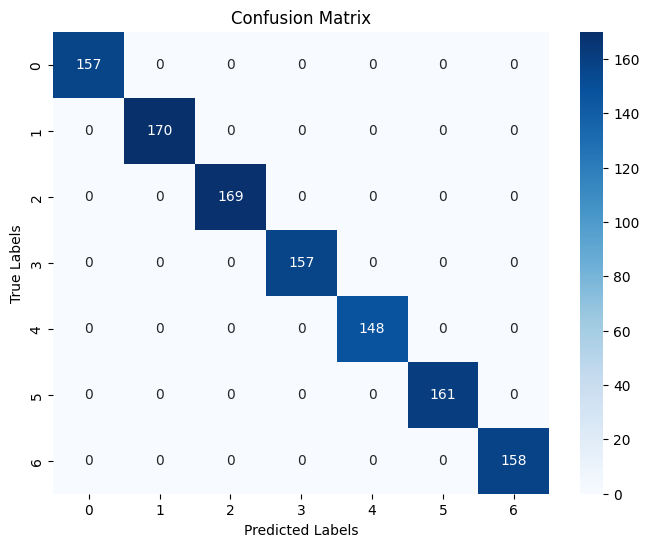


📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


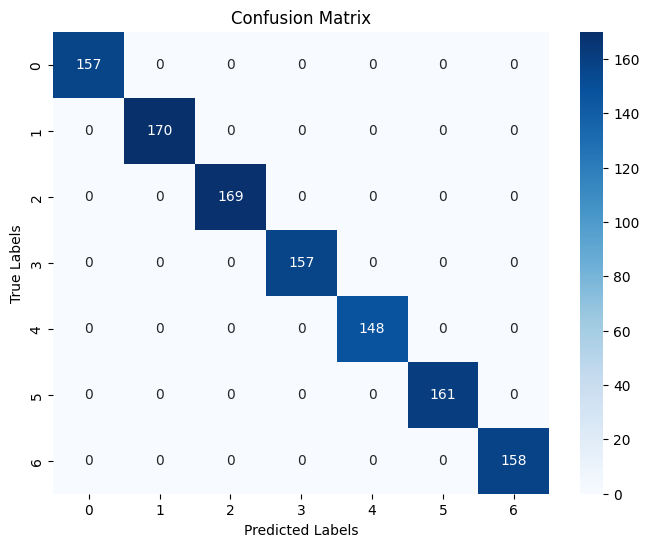

TrainOutput(global_step=840, training_loss=0.30520482971554713, metrics={'train_runtime': 409.3273, 'train_samples_per_second': 32.834, 'train_steps_per_second': 2.052, 'total_flos': 2.4403696128e+17, 'train_loss': 0.30520482971554713, 'epoch': 3.0})

In [31]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.030951,0.995536,0.995664,0.995536,0.995533
2,0.024900,0.007038,1.000000,1.000000,1.000000,1.000000
3,0.024900,0.006110,1.000000,1.000000,1.000000,1.000000



📊 Model Evaluation Metrics:
✅ Accuracy: 0.9955
🎯 Precision: 0.9957
🔄 Recall: 0.9955
⭐ F1 Score: 0.9955


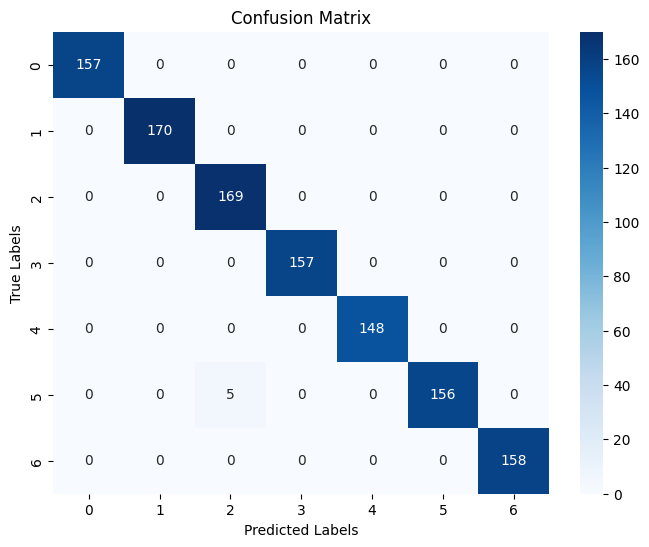


📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


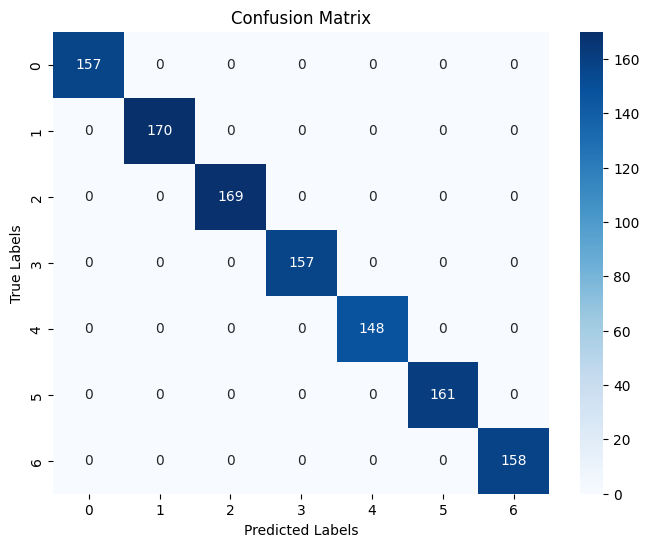


📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


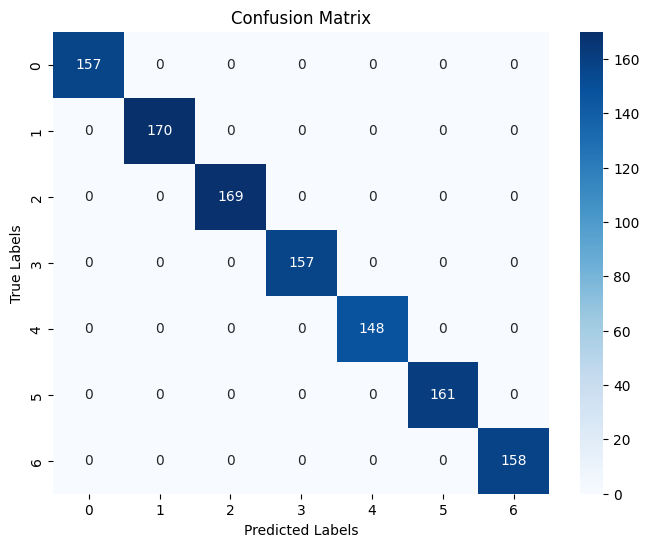


📊 Model Evaluation Metrics:
✅ Accuracy: 1.0000
🎯 Precision: 1.0000
🔄 Recall: 1.0000
⭐ F1 Score: 1.0000


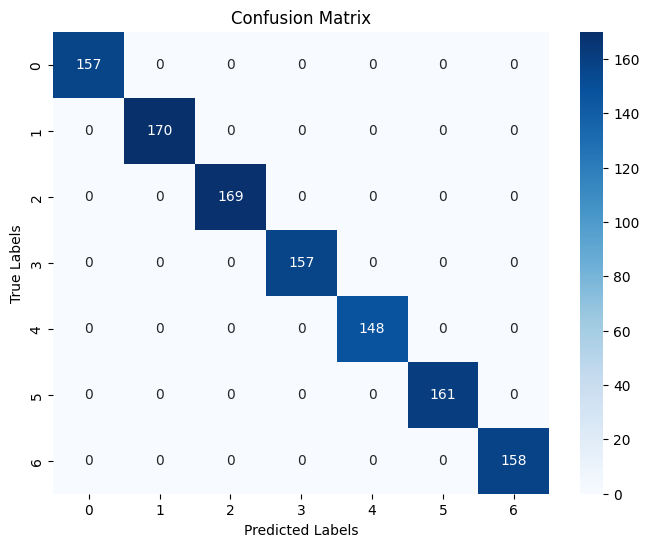

Final Accuracy: 100.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       170
           2       1.00      1.00      1.00       169
           3       1.00      1.00      1.00       157
           4       1.00      1.00      1.00       148
           5       1.00      1.00      1.00       161
           6       1.00      1.00      1.00       158

    accuracy                           1.00      1120
   macro avg       1.00      1.00      1.00      1120
weighted avg       1.00      1.00      1.00      1120



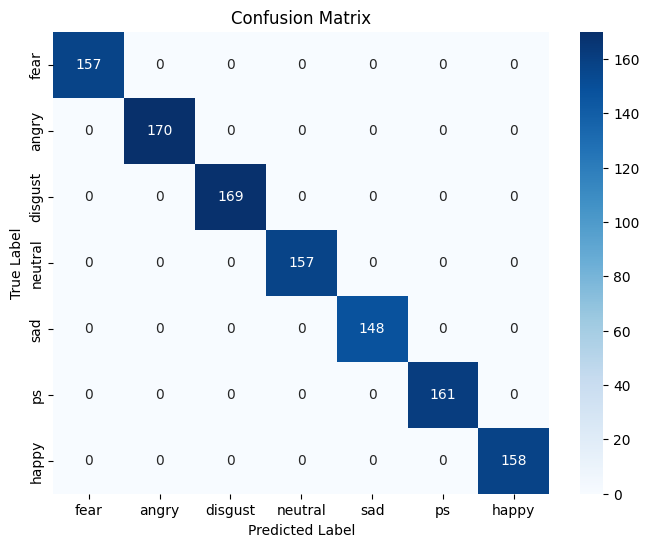

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute accuracy
def compute_accuracy(trainer, test_dataset):
    predictions = trainer.predict(test_dataset)
    pred_labels = predictions.predictions.argmax(-1)  # Get predicted labels
    true_labels = predictions.label_ids  # Get true labels

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, pred_labels) * 100  # Convert to percentage
    return accuracy, true_labels, pred_labels

# Train the model
trainer.train()

# Compute accuracy on test dataset
accuracy, true_labels, pred_labels = compute_accuracy(trainer, test_dataset)
print(f"Final Accuracy: {accuracy:.2f}%")  # Print accuracy in percentage

# Print classification report
print("Classification Report:\n", classification_report(true_labels, pred_labels))

# Plot confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


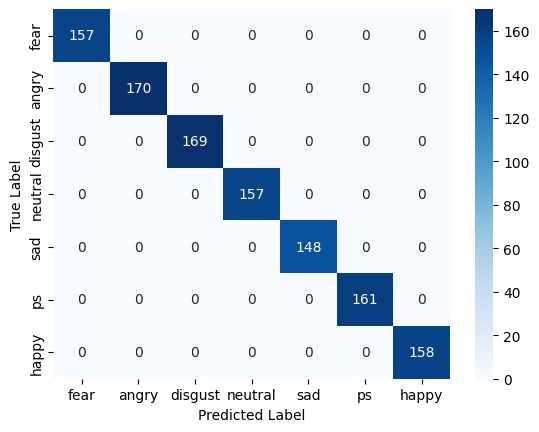

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
results = trainer.evaluate()
print(results)

### Test Predictions

In [ ]:
import random
#import torch
idx = random.randrange(0, len(test_dataset))
print("Original Label:", inverse_label_map[int(test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')
#input_values = torch.tensor(test_dataset[idx]['input_values']).unsqueeze(0).to('cuda')

with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits

predicted_class = logits.argmax(dim=-1).item()
print('Predicted Label:', inverse_label_map[predicted_class])

In [ ]:
idx = random.randrange(0, len(test_dataset))
print("Original Label:", inverse_label_map[int(test_dataset[idx]['labels'])])
input_values = test_dataset[idx]['input_values'].unsqueeze(0).to('cuda')
#input_values = torch.tensor(test_dataset[idx]['input_values']).unsqueeze(0).to('cuda')

with torch.no_grad():
    outputs = model(input_values)
logits = outputs.logits

predicted_class = logits.argmax(dim=-1).item()
print('Predicted Label:', inverse_label_map[predicted_class])

In [ ]:
!pip install spotipy

In [ ]:
import random
import torch
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Define emotion-to-genre mapping
label_to_genre = {
    "happy": "pop",
    "sad": "blues",
    "disgust": "alternative",
    "fear": "ambient",
    "angry": "rock",
    "neutral": "classical",
    "ps": "lofi"
}

# Get predicted label
idx = random.randrange(0, len(test_dataset))
print("Original Label:", inverse_label_map[int(test_dataset[idx]['labels'])])

input_values = torch.tensor(test_dataset[idx]['input_values']).unsqueeze(0).to('cuda')

with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()
predicted_label = inverse_label_map[predicted_class]

print('Predicted Label:', predicted_label)

# Get genre based on label
genre = label_to_genre.get(predicted_label, "pop")  # Default to pop if unknown

# Spotify API Credentials
SPOTIPY_CLIENT_ID = "31396ec8838d405cbf7900b3c6e3efc8"
SPOTIPY_CLIENT_SECRET = "0a156297de02484cbd0e5783d7a395c9"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=SPOTIPY_CLIENT_ID,
    client_secret=SPOTIPY_CLIENT_SECRET
))

# Search for recommended songs
results = sp.search(q=genre, type='track', limit=5)

print("\n🎵 Recommended Songs:")
for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx+1}. {track['name']} by {track['artists'][0]['name']}")

In [ ]:
# # Get predicted label
# idx = random.randrange(0, len(test_dataset))
# print("Original Label:", inverse_label_map[int(test_dataset[idx]['labels'])])

# input_values = torch.tensor(test_dataset[idx]['input_values']).unsqueeze(0).to('cuda')

# with torch.no_grad():
#     outputs = model(input_values)

# logits = outputs.logits
# predicted_class = logits.argmax(dim=-1).item()
# predicted_label = inverse_label_map[predicted_class]

# print('Predicted Label:', predicted_label)

# # Get genre based on label
# genre = label_to_genre.get(predicted_label, "pop")  # Default to pop if unknown

# # Spotify API Credentials
# SPOTIPY_CLIENT_ID = "31396ec8838d405cbf7900b3c6e3efc8"
# SPOTIPY_CLIENT_SECRET = "0a156297de02484cbd0e5783d7a395c9"

# sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
#     client_id=SPOTIPY_CLIENT_ID,
#     client_secret=SPOTIPY_CLIENT_SECRET
# ))

# # Search for recommended songs
# results = sp.search(q=genre, type='track', limit=5)

# print("\n🎵 Recommended Songs:")
# for idx, track in enumerate(results['tracks']['items']):
#     print(f"{idx+1}. {track['name']} by {track['artists'][0]['name']}")


import random
import torch
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Get predicted label
idx = random.randrange(0, len(test_dataset))
print("Original Label:", inverse_label_map[int(test_dataset[idx]['labels'])])

input_values = torch.tensor(test_dataset[idx]['input_values']).unsqueeze(0).to('cuda')

with torch.no_grad():
    outputs = model(input_values)

logits = outputs.logits
predicted_class = logits.argmax(dim=-1).item()
predicted_label = inverse_label_map[predicted_class]

print('Predicted Label:', predicted_label)

# Get genre based on label
genre = label_to_genre.get(predicted_label, "pop")  # Default to pop if unknown

# Spotify API Credentials
SPOTIPY_CLIENT_ID = "31396ec8838d405cbf7900b3c6e3efc8"
SPOTIPY_CLIENT_SECRET = "0a156297de02484cbd0e5783d7a395c9"

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id=SPOTIPY_CLIENT_ID,
    client_secret=SPOTIPY_CLIENT_SECRET
))

# Search for recommended songs
results = sp.search(q=genre, type='track', limit=5)

print("\n🎵 Recommended Songs:")
for idx, track in enumerate(results['tracks']['items']):
    song_name = track['name']
    artist_name = track['artists'][0]['name']
    song_url = track['external_urls']['spotify']
    
    print(f"{idx+1}. {song_name} by {artist_name} - [Listen Here]({song_url})")
